# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [6]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2017-03-10 17:22:56--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.66.1
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... połączono.


Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 

302 Found
Lokalizacja: https://dl.dropboxusercontent.com/content_link/VFeHGIZUcaAGQvZD2CMNfCz73ISwy1gWQOApyTWvIWltLina6phSCHCWKWFxzesl/file?dl=1 [podążanie]
--2017-03-10 17:22:56--  https://dl.dropboxusercontent.com/content_link/VFeHGIZUcaAGQvZD2CMNfCz73ISwy1gWQOApyTWvIWltLina6phSCHCWKWFxzesl/file?dl=1
Translacja dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6
Łączenie się z dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... 

połączono.


Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 

200 OK
Długość: 6211 (6,1K) [text/csv]
Zapis do: `mieszkania.csv'

100%[======================================>] 6.211       --.-K/s   w 0s       

2017-03-10 17:22:57 (1,20 GB/s) - zapisano `mieszkania.csv' [6211/6211]



--2017-03-10 17:22:57--  https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.66.1
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... połączono.


Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 

302 Found
Lokalizacja: https://dl.dropboxusercontent.com/content_link/U5zYErrsNbAHSn2zTb4p5L9jVBQaPhVZ3mPuunqCnN9irG83OwhiooCTR33uH2zG/file?dl=1 [podążanie]
--2017-03-10 17:22:57--  https://dl.dropboxusercontent.com/content_link/U5zYErrsNbAHSn2zTb4p5L9jVBQaPhVZ3mPuunqCnN9irG83OwhiooCTR33uH2zG/file?dl=1
Translacja dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6
Łączenie się z dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... 

połączono.


Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 

200 OK
Długość: 6247 (6,1K) [text/csv]
Zapis do: `mieszkania_test.csv'

100%[======================================>] 6.247       --.-K/s   w 0s       

2017-03-10 17:22:58 (566 MB/s) - zapisano `mieszkania_test.csv' [6247/6247]



In [6]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [2]:
%matplotlib inline

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [4]:
import numpy as np
from mieszkania import csv2np, msle

prices = csv2np('cena', int)
print 'srednia cena:', np.average(prices)

print msle(prices, np.ones(len(prices)) * np.average(prices))

srednia cena: 507919.49
0.625719868492


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [5]:
import math
q2 = np.average(np.log(prices+1.))
P = 1+math.exp(q2)
print q2, P
print msle(prices, np.ones(len(prices)) * P)

12.9748755981 431437.491582
0.604060934207


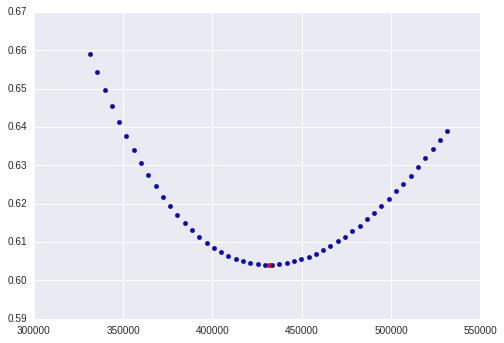

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

xs = np.linspace(431437.491582-100000, 431437.491582+100000, 50)
plot_pts = map(lambda p: msle(prices, np.ones(len(prices))*p), xs)
plt.scatter(xs,plot_pts)
plt.scatter([431437], [msle(prices, np.ones(len(prices))*431437)], c='r')

In [7]:
from mieszkania import open_dataset
xs, ys = open_dataset('mieszkania.csv')

m2, syp, laz, rok, garaz, dzielnica[4]
[104, 2, 2, 1940, 1, 0, 1, 0, 0]


Now, let's implement a standard linear regression model. 

RMSE: 266720.87074
w: [  1.01792424e+02   1.94297120e+00   1.48775277e+00   2.55233361e+02
   1.23664809e-01  -4.06959075e-01   3.38569820e-01   2.36191287e-01
  -4.50216218e-02]
0.617145852367


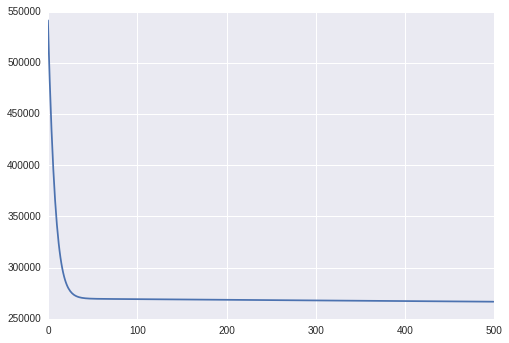

In [8]:
# Opt bezposrednio
from rmse_regr import RMSERegr
lr = 1E-8
steps = 500 #TODO

regr = RMSERegr()

w = regr.regression(xs, ys, [lr] * steps)
my_prices=np.sum(xs*w, axis=1)
print msle(prices, my_prices)

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change algorithm.
</sup></sub></sup></sub></sup></sub>

RMSE: 0.587524017369
w: [  4.62633918e-04   1.02509009e-05   7.98187639e-06   6.59480962e-03
   1.76109085e-06  -3.65708764e-08   1.31193061e-06   1.22637249e-06
   8.74436282e-07]
0.587523921119


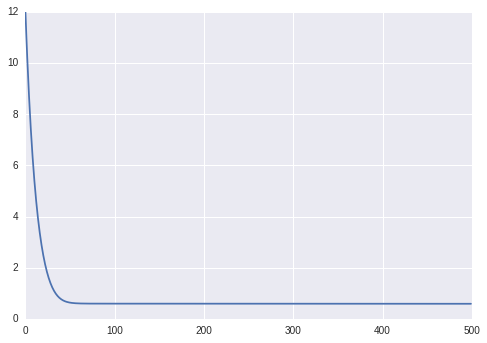

In [9]:
# Opt logarytm
from rmse_regr import RMSERegr
lr = 1E-8
steps = 500 #TODO

regr = RMSERegr()

w = regr.regression(xs, np.log(1+ys), [lr] * steps)
my_prices=np.exp(np.sum(xs*w, axis=1))+1
print msle(prices, my_prices)

RMSE: 0.210603944614
w: [ 0.73750872  0.1905506   0.16551335  1.24550918  0.05683715 -0.0225488
  0.05788204  0.06209527  0.01641197]
0.210604851577


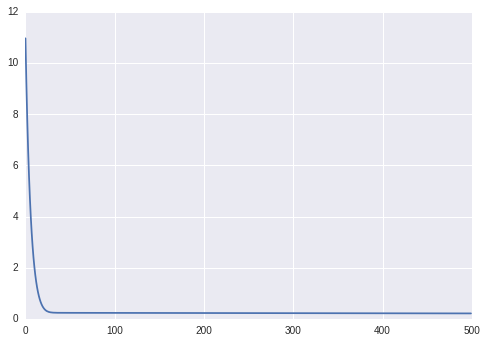

In [13]:
# Opt logarytm
from rmse_regr import RMSERegr
lr = 1E-3
steps = 500 #TODO

regr = RMSERegr()

zs = np.log(xs + 1)
w = regr.regression(zs, np.log(1+ys), [lr] * steps)
my_prices=np.exp(np.sum(zs*w, axis=1))+1
print msle(prices, my_prices)

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

[  1.04000000e+02   2.00000000e+00   2.00000000e+00   1.94000000e+03
   1.00000000e+00   0.00000000e+00   1.04000000e+02   0.00000000e+00
   0.00000000e+00]
RMSE: 0.0852622543225
w: [ 0.67154346  0.16629164  0.14498924  1.19572032  0.05439329  0.09580969
  0.21053774  0.21571329  0.14948274]
0.0852621984549
[ 97  92 102 100 102  98  90 105  89 101  85  96 101 109 104  96  97  99
  85 105 101 101  90  86 107  96 108  93  99 108 112  94  99 110 100  94
  86  92  87 106  95 102 100 100  93  95 115  98  95 106  97 100  97  96
  98  97 106  93 105 108 102  99  79 104  98 104  90 106 108  95 107  83
 106 107 107  97  96  95 101  96  89 118 105  93  88 101  96 108 101 133
 101 110  93  96  93 101 108 108  96 101  85  99 102  98  94  90  90 105
 104  99  97  97 101  92 109 105  99 128  97 102 106  80 106  99  98  92
  96  88  86 111 101  94 106 101  98  80 102 107  81 101  98  95  91 101
 100  96  98  99 108  95  99 121 106 101  94  98  92  97  89 102  93  98
 107  93 104 109 104  96  98 108 1

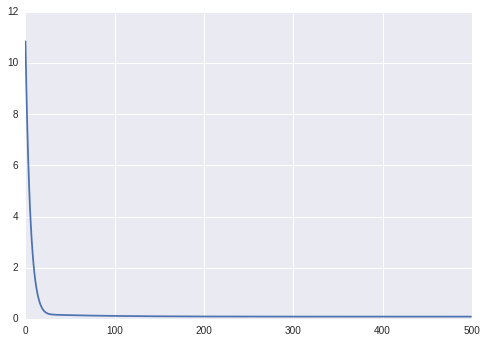

In [16]:
###         m2, syp, łaź, rok, garaż, dzielnica[4]
# xs[0] = [104, 2, 2, 1940, 1, 0, 1, 0, 0], ys[0] = 780094.0

from rmse_regr import RMSERegr

lr = 1E-3
steps = 500 #TODO

regr = RMSERegr()

zs =np.concatenate((xs[:,:-4], xs[:, -4:] * xs[:,:1]), axis=1)
# zs = xs
print zs[0]

zs = np.log(zs + 1)
w = regr.regression(zs, np.log(1+ys), [lr] * steps)
my_prices=np.exp(np.sum(zs*w, axis=1))+1
print msle(prices, my_prices)
print (my_prices / ys * 100).astype(int)
# print np.concatenate((prices.reshape((-1,1)), my_prices.reshape((-1,1)), 
                      # (prices / my_prices).reshape((-1,1))
                      # ), axis=1)

[ 104    2    2 1940    1    0  104    0    0]


RMSE: 30143.1126531
w: [ 4701.14472029    87.7821127     64.39606313    15.61490757     9.93016715
  -747.3203698   2406.12748662  2597.71092322   444.62668024]
[4701   87   64   15    9 -747 2406 2597  444] [ 104    2    2 1940    1    0  104    0    0]
0.0888496814987
[ 98  99 102  99  99 102  97 118  98 100  89  97 103 104  95  95 104 100
  87 102 101  96  91  90 100 101 112  91 102 107 108  96 104 120  94  95
  97  95  95 111  90  99 101  97  96 102 132 100  98 104  98  99 107  97
  94  99  99  96 110 101 111 111  87 101  99 103  91 100 103  99 115  89
 114 100 109  98  96  97 103  93  90 112  99  96  98  99 101 107 100 126
  95 115 106  94  94 102 104 108  94 102  94 101 104  98  90  96 102 104
 111 104 100  91 101  91 103 108 107 136  95 107 118  83 100 103  94  94
  96  98  94 107 106  87 106 102  94  82 113 104  82  99  98  97  96 100
  95 100  97  99 110  94 102 136 102 101  95  96  85  91  89  96  89 100
 106  96  98 109 102  98  92 107  99  83 105 107 108  97 105 101 108 101

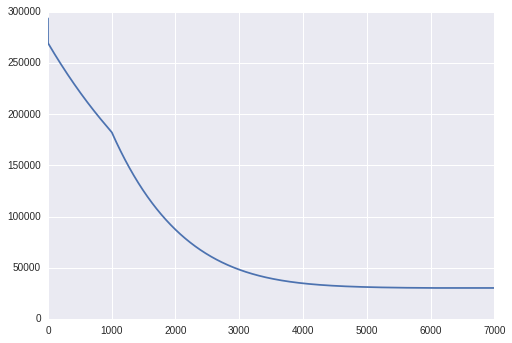

In [15]:
#         m2, syp, łaź, rok, garaż, dzielnica[4]
# xs[0] = [104, 2, 2, 1940, 1, 0, 1, 0, 0], ys[0] = 780094.0

from rmse_regr import RMSERegr

lr = 1E-4
steps = 500 #TODO

regr = RMSERegr()

zs =np.concatenate((xs[:,:-4], xs[:, -4:] * xs[:,:1]), axis=1)
# zs = xs
# zs = xs[:, -4:] * xs[:,:1]
print zs[0].astype(int)

w = regr.regression(zs, ys, [1e-7]*1000+[2e-7]*5000+[1e-9]*1000)
print w.astype(int), zs[0].astype(int)
my_prices=np.sum(zs*w, axis=1)
print msle(prices, my_prices)
print (my_prices / ys * 100).astype(int)
# print np.concatenate((prices.reshape((-1,1)), my_prices.reshape((-1,1)), 
# (prices / my_prices).reshape((-1,1))
# ), axis=1)

In [17]:
test_xs, test_ys = open_dataset('mieszkania_test.csv')
zs = np.concatenate((test_xs[:,:-4], test_xs[:, -4:] * test_xs[:,:1]), axis=1)
zs = np.log(zs + 1)
t_prices=np.exp(np.sum(zs*w, axis=1))+1
print msle(t_prices, test_ys)

print (t_prices / test_ys * 100).astype(int)

m2, syp, laz, rok, garaz, dzielnica[4]
[71, 2, 2, 1912, 1, 0, 0, 0, 1]
0.138848345284
[127 104  94 101 101 104 124  95  93  98  89 100 112  96 106  91  99  83
 146  91 109 101  94 112 142  99 105 104 101 109 111  97 140  97  97  89
 101  91  98  98 103  97  98  99  97  80  87  96 101 102 106  96 111  87
  99 106 156  99  99 104  98 107  96 100 108 102 103 100 110 102  96  96
 117  96 123  95 129 101  92  99 113  99  97 102  96  97 101 104 118  96
  98 107 110  93 101 100 105 109 104 100  90 112 103 123  98  94  98 157
  98  96  98  95 236 106 110  90 135  96 106 107 101  96 103 101 102  89
 117 103  98  95  94 111  94 101  99  91  92 159 100 109 103 103  97  98
 105  99 100 109 103  97  93  95  98  96 100  98  90 102  93 146  95 104
 102  93  89 104 100 102 105 102  97  92 108 101 108 106  99  97  67  98
 106  94  97  95 114 221 105 104 111 106  95  96 103  94 119 123 110  97
 108 103]
